# MNIST

In [1]:
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X, y = mnist.data, mnist.target

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
X.shape

(70000, 784)

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
y.shape

(70000,)

In [11]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

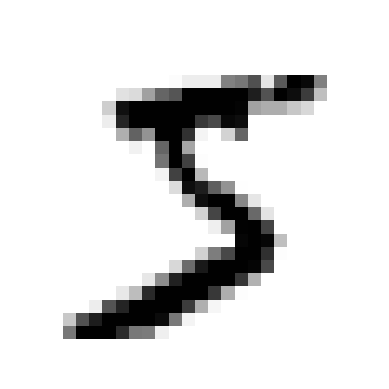

In [12]:
plot_digit(X[0])
plt.show()

In [13]:
y[0]

'5'

In [14]:
X_train, X_test, y_train, y_test = X[:6000], X[:1000], y[:6000], y[:1000]

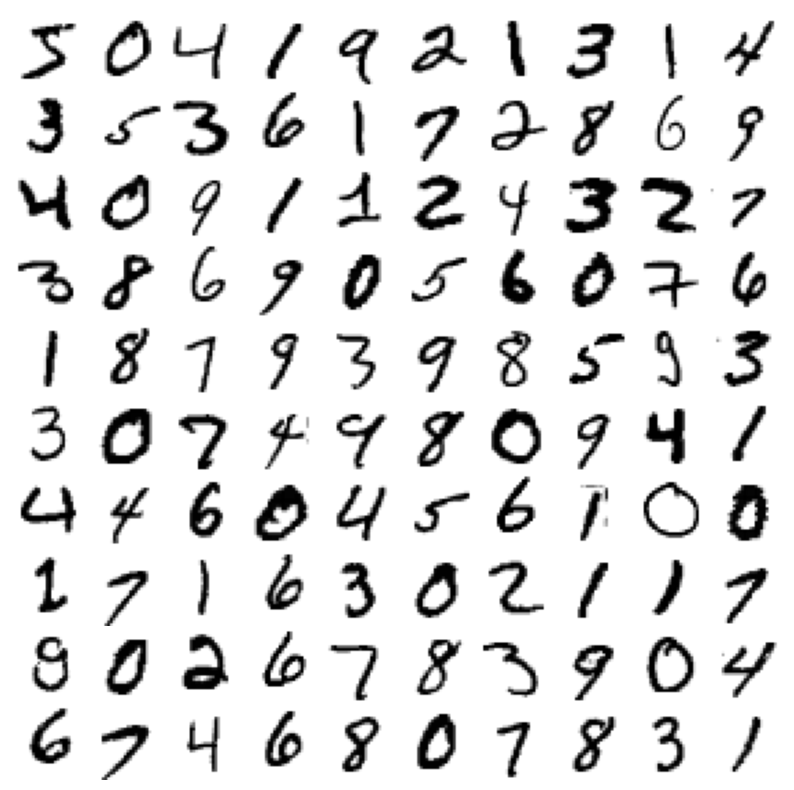

In [15]:
plt.figure(figsize = (10, 10))
for i, image in enumerate(X[:100]):
    plt.subplot(10, 10, i + 1)
    plot_digit(image)
plt.subplots_adjust(wspace= 0, hspace = 0)
save_fig("digits", tight_layout=False)
plt.show()

## Training Binary Classifier

In [16]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([X[0]])

array([ True])

## Performance Measures

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.962 , 0.956 , 0.9665])

In [20]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [21]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.914 , 0.9145, 0.9145])

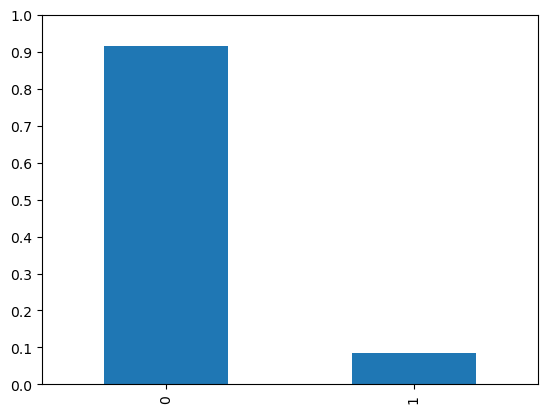

In [22]:
# Extra code - visualization desbalanced data
import pandas as pd
import numpy as np
y_train_5_df = pd.DataFrame(y_train_5.astype(int))
fq = y_train_5_df.iloc[:,0].value_counts()
fq.replace(fq.values, fq.values / sum(fq.values), inplace= True)
fq.plot(kind = 'bar')
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel(None)
plt.show()

In [23]:
del y_train_5_df, fq

### Implementing Cross-Validation

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) # add shuffle=True if the dataset is
                                        # not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_sgd = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_5_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_5_folds = y_train_5[test_index]

    clone_sgd.fit(X_train_folds, y_train_5_folds)
    y_pred = clone_sgd.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_5_folds)
    print(n_correct / len(y_test_5_folds))

0.962
0.956
0.9665


### Cross-Validation Predict

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [27]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[5486,    0],
       [   0,  514]], dtype=int64)

### Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7801980198019802

In [29]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.7801980198019802

In [30]:
recall_score(y_train_5, y_train_pred)

0.7665369649805448

In [31]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.7665369649805448

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7733071638861629

In [33]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7733071638861629

### Precision / Recall trade-off

In [34]:
y_scores = sgd_clf.decision_function([X[0]])
y_scores

array([38042.34312442])

In [35]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
threshold = 40000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, 
                             method = "decision_function")

In [38]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

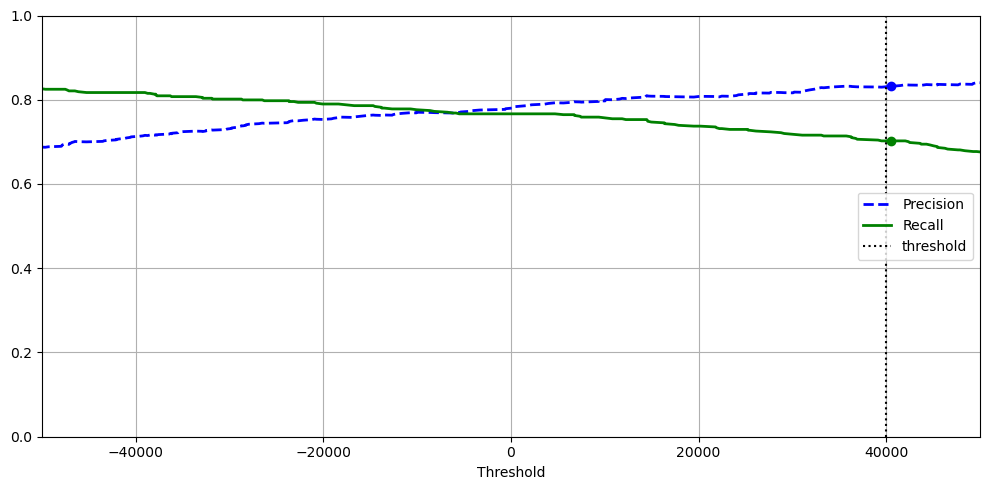

In [39]:
plt.figure(figsize = (10, 5))
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label = "threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

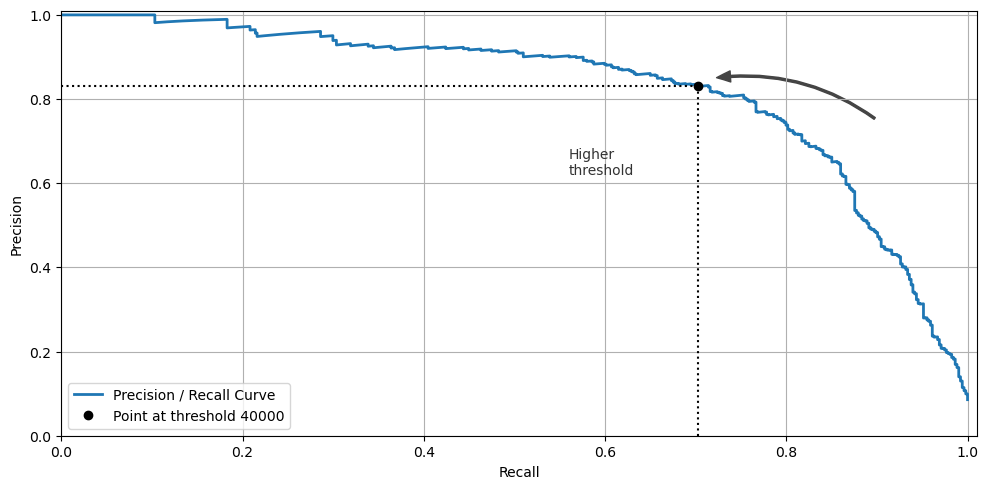

In [40]:
import matplotlib.patches as patches

plt.figure(figsize = (10, 5))
plt.plot(recalls, precisions, linewidth = 2, label = "Precision / Recall Curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label= f"Point at threshold {threshold}")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.90, 0.75), (0.72, 0.85),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [41]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

105660.23702487054

In [42]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9012345679012346

In [44]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.5680933852140078

### The ROC Curve

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [46]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

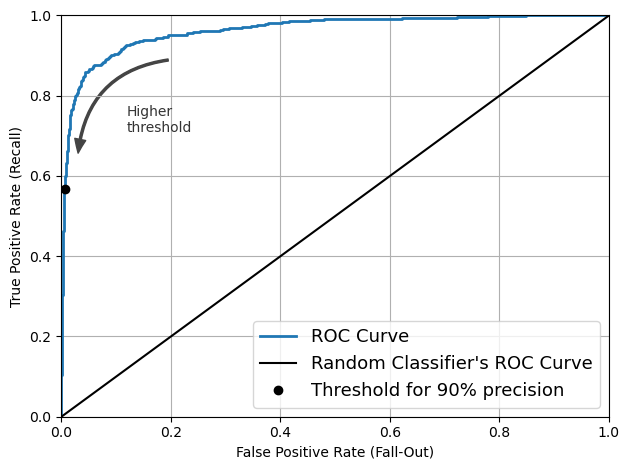

In [47]:
plt.plot(fpr, tpr, linewidth = 2, label = "ROC Curve")
plt.plot([0, 1], [0, 1], 'k', label = "Random Classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90], "ko", label = "Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.03, 0.65),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9641599203348885

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, 
                             method = "predict_proba")

In [51]:
y_probas_forest[:2]

array([[0.37, 0.63],
       [0.98, 0.02]])

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [52]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

93.9%


In [53]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

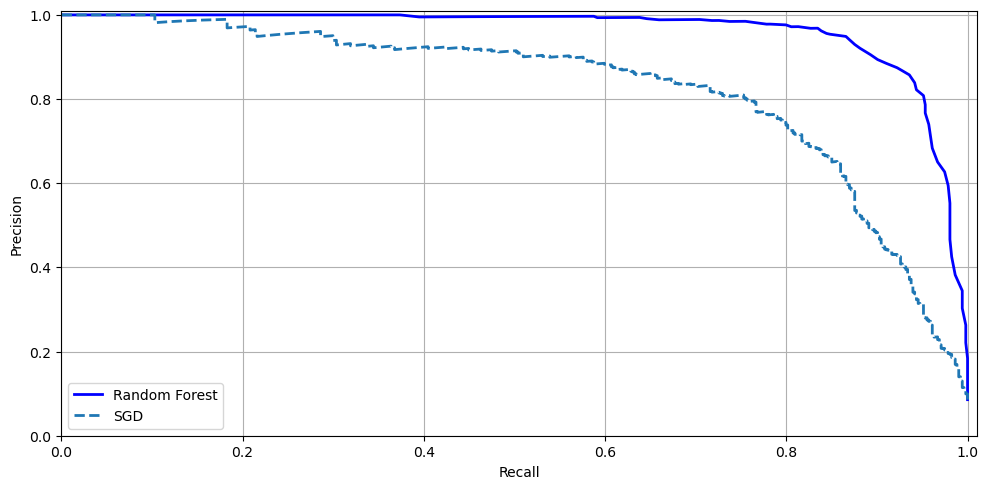

In [54]:
plt.figure(figsize = (10, 5))
plt.plot(recalls_forest, precisions_forest, "b", linewidth = 2, label = "Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.legend(loc = "lower left")
plt.grid()
save_fig("pr_curve_comparison_plot")

plt.show()

In [55]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  #positive proba >= 50%
f1_score(y_train_5, y_train_pred_forest)

0.8105625717566016

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9936162229715256

In [57]:
precision_score(y_train_5, y_train_pred_forest)

0.988795518207283

In [58]:
recall_score(y_train_5, y_train_pred_forest)

0.6867704280155642

## Multiclass Classification

In [67]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [69]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [74]:
some_digit_scores = svm_clf.decision_function([X[0]])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [75]:
class_id = some_digit_scores.argmax()
class_id

5

In [76]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [77]:
svm_clf.classes_[class_id]

'5'

In [78]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [79]:
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [80]:
len(ovr_clf.estimators_)

10

In [81]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [82]:
sgd_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [83]:
sgd_clf.decision_function([X[0]]).round()

array([[-735712., -857058., -281086.,    8290., -616793.,   29040.,
        -492305., -834395., -318385., -363474.]])

In [84]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8565, 0.8715, 0.8635])

In [85]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8705, 0.8985, 0.8925])